# Exploratory analysis
A brief exploratory analysis example. 

### Iris datasets
The exploratory analysis is done using iris dataset.

In [1]:
source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox-examples/main/jupyter_daltoolbox.R")

#loading DAL
load_daltoolbox() 

source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/tutorial/graphics-extra.R")

loadlibrary("ggplot2")
loadlibrary("dplyr")
loadlibrary("reshape")
loadlibrary("RColorBrewer")
loadlibrary("corrplot")
loadlibrary("WVPlots")
loadlibrary("GGally")
loadlibrary("aplpack")

Warning message:
“no DISPLAY variable so Tk is not available”


In [2]:
colors <- brewer.pal(4, 'Set1')
font <- theme(text = element_text(size=16))

## Part 1

In [3]:
loadlibrary("MASS")
data(iris)

In [4]:
head(iris[c(1:3,51:53,101:103),])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor


### Data Summary
A preliminary analysis using the $Sepal.Length$ attribute. 

This should be done for all attributes. 

In [5]:
sum <- summary(iris$Sepal.Length)
sum

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

In [6]:
IQR <- sum["3rd Qu."]-sum["1st Qu."]
print(sprintf("IQR=%.1f", IQR))

[1] "IQR=1.3"


## Part 2

In [7]:
options(repr.plot.width=4, repr.plot.height=4)

### Histogram analysis

Using  as id variables



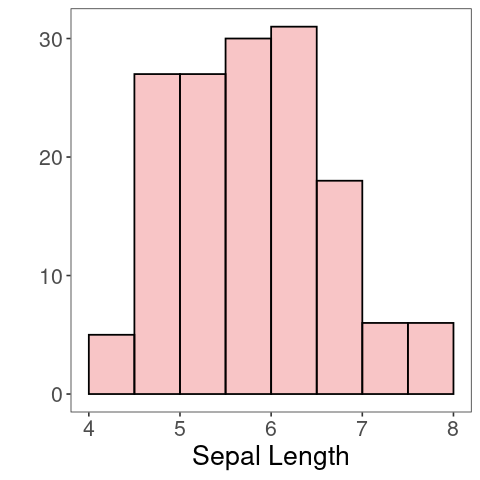

In [8]:
grf <- plot_hist(iris %>% dplyr::select(Sepal.Length), 
          label_x = "Sepal Length", color=colors[1]) + font
plot(grf)

Grouping graphics

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



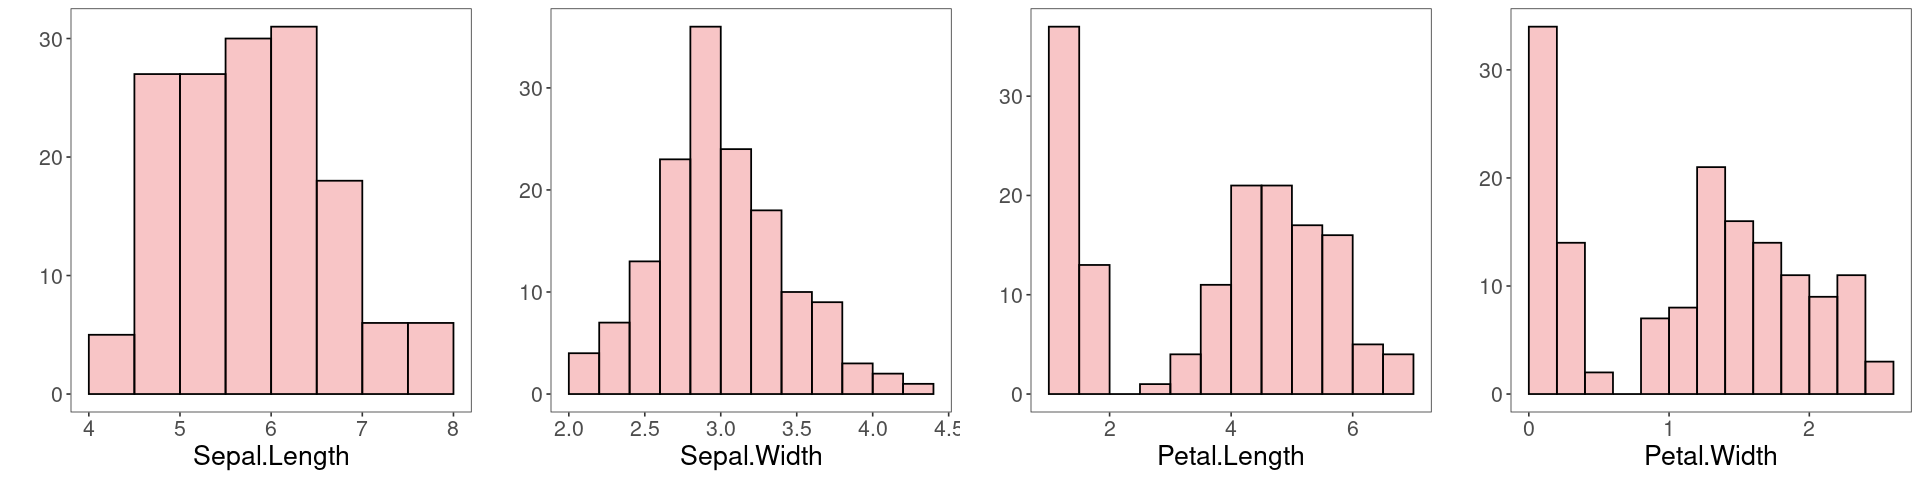

In [9]:
grf1 <- plot_hist(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font
grf2 <- plot_hist(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font  
grf3 <- plot_hist(iris %>% dplyr::select(Petal.Length), 
                  label_x = "Petal.Length", color=colors[1]) + font 
grf4 <- plot_hist(iris %>% dplyr::select(Petal.Width), 
                  label_x = "Petal.Width", color=colors[1]) + font

loadlibrary("gridExtra") 
options(repr.plot.width=16, repr.plot.height=4)
grid.arrange(grf1, grf2, grf3, grf4, ncol=4)
options(repr.plot.width=4, repr.plot.height=4)

### Density distribution

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



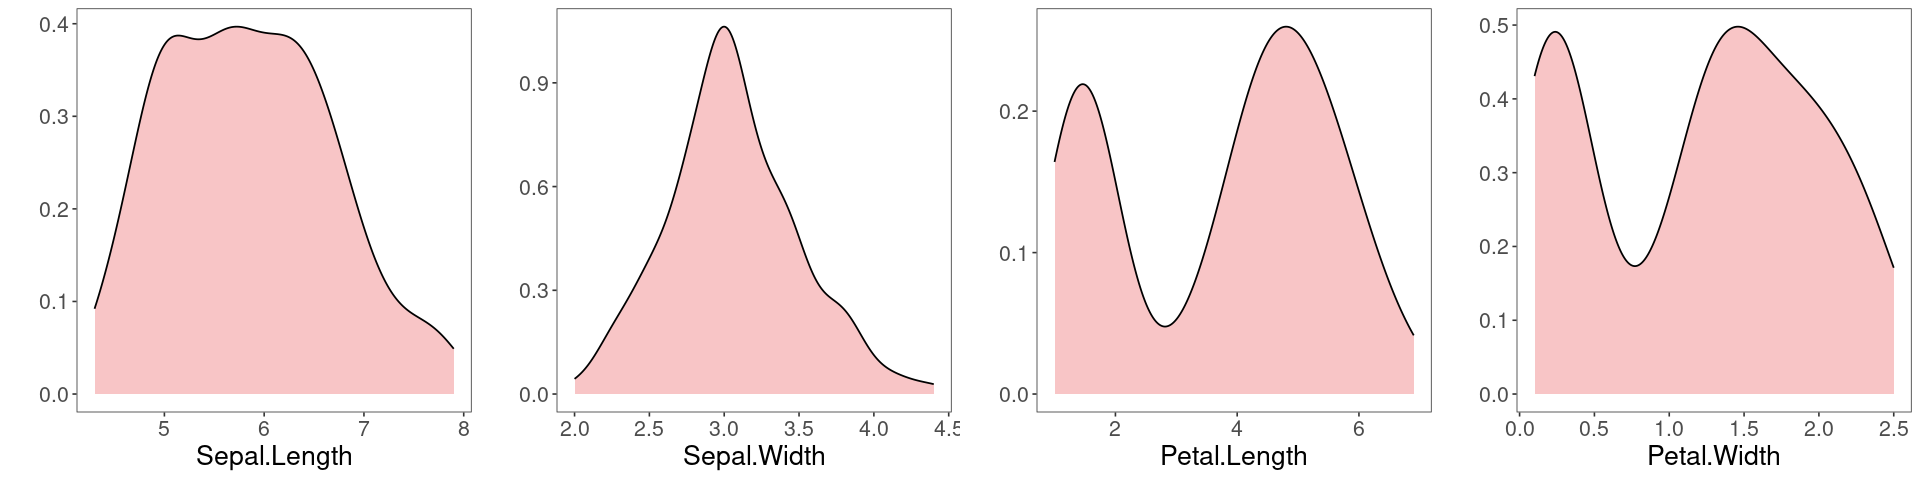

In [10]:
grf1 <- plot_density(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font
grf2 <- plot_density(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font  
grf3 <- plot_density(iris %>% dplyr::select(Petal.Length), 
                  label_x = "Petal.Length", color=colors[1]) + font 
grf4 <- plot_density(iris %>% dplyr::select(Petal.Width), 
                  label_x = "Petal.Width", color=colors[1]) + font

options(repr.plot.width=16, repr.plot.height=4)
grid.arrange(grf1, grf2, grf3, grf4, ncol=4)
options(repr.plot.width=4, repr.plot.height=4)

### Box-plot analysis

Using Species as id variables



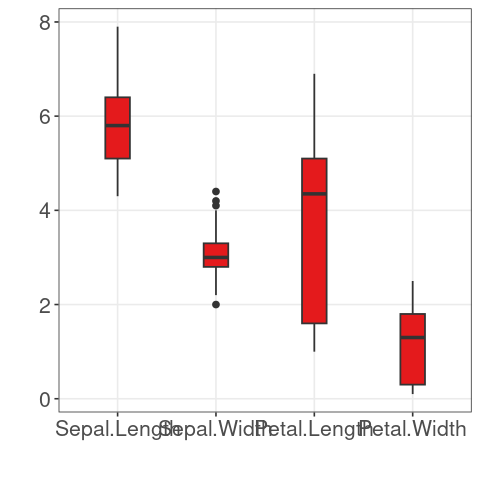

In [11]:
grf <- plot_boxplot(iris, colors=colors[1]) + font
plot(grf)

### Consider the classification problem targeting to predict the species

### Density distribution colored by the classifier

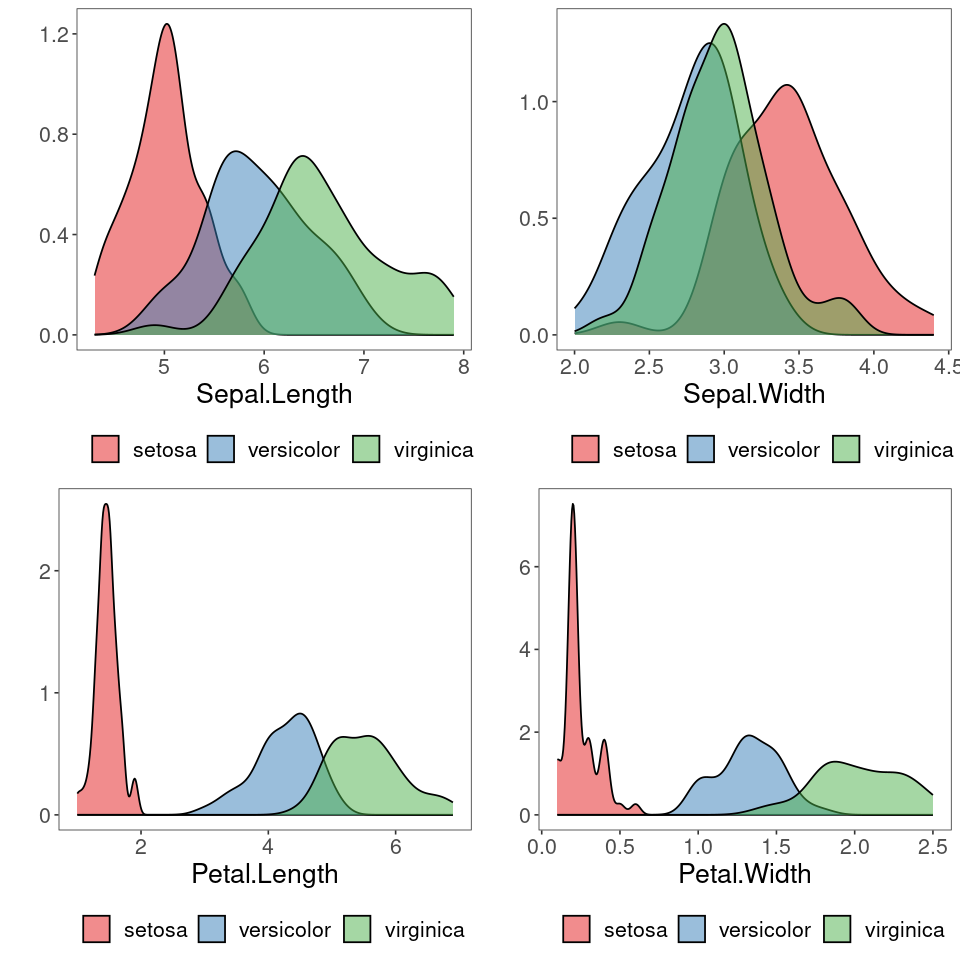

In [12]:
grfA <- plot_density_class(iris %>% dplyr::select(Species, Sepal.Length), 
            class_label="Species", label_x = "Sepal.Length", color=colors[c(1:3)]) + font
grfB <- plot_density_class(iris %>% dplyr::select(Species, Sepal.Width), 
            class_label="Species", label_x = "Sepal.Width", color=colors[c(1:3)]) + font
grfC <- plot_density_class(iris %>% dplyr::select(Species, Petal.Length), 
            class_label="Species", label_x = "Petal.Length", color=colors[c(1:3)]) + font
grfD <- plot_density_class(iris %>% dplyr::select(Species, Petal.Width), 
            class_label="Species", label_x = "Petal.Width", color=colors[c(1:3)]) + font

options(repr.plot.width=8, repr.plot.height=8)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
options(repr.plot.width=4, repr.plot.height=4)

### Box-plot analysis grouped by the classifier

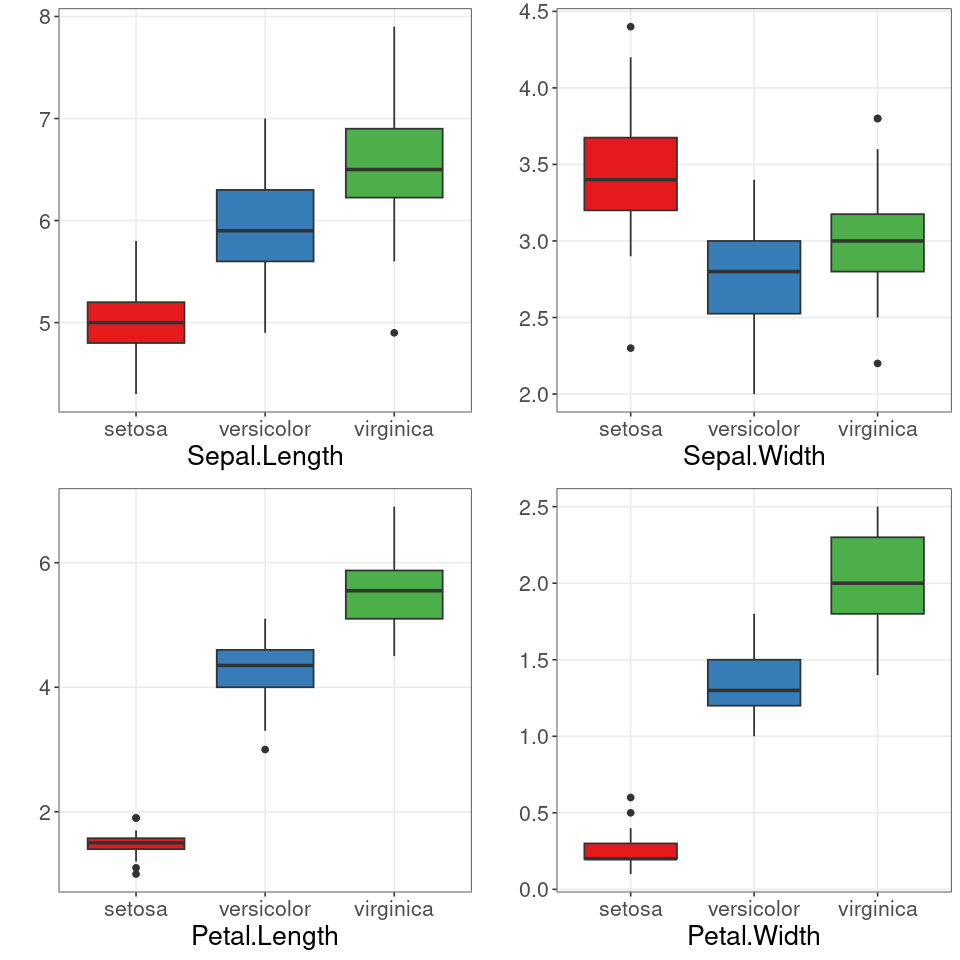

In [13]:
grfA <- plot_boxplot_class(iris %>% dplyr::select(Species, Sepal.Length), 
          class_label="Species", label_x = "Sepal.Length", color=colors[c(1:3)]) + font
grfB <- plot_boxplot_class(iris %>% dplyr::select(Species, Sepal.Width), 
          class_label="Species", label_x = "Sepal.Width", color=colors[c(1:3)]) + font
grfC <- plot_boxplot_class(iris %>% dplyr::select(Species, Petal.Length), 
          class_label="Species", label_x = "Petal.Length", color=colors[c(1:3)]) + font
grfD <- plot_boxplot_class(iris %>% dplyr::select(Species, Petal.Width), 
          class_label="Species", label_x = "Petal.Width", color=colors[c(1:3)]) + font

options(repr.plot.width=8, repr.plot.height=8)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
options(repr.plot.width=4, repr.plot.height=4)

## Part 3

### Scatter plot

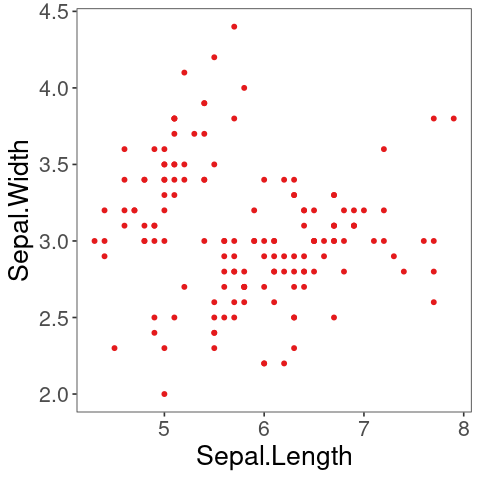

In [14]:
grf <- plot_scatter(iris |> dplyr::select(x=Sepal.Length, value=Sepal.Width) |> mutate(variable = "iris"), 
                    label_x = "Sepal.Length", 
                    label_y = "Sepal.Width", colors=colors[1]) +
                    theme(legend.position = "none") + font
plot(grf)

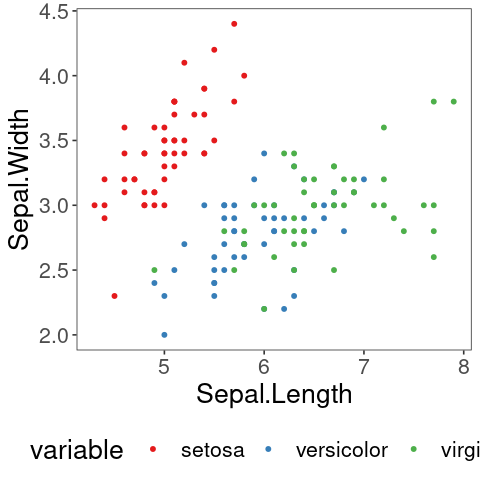

In [15]:
grf <- plot_scatter(iris |> dplyr::select(x = Sepal.Length, value = Sepal.Width, variable = Species), 
                    label_x = "Sepal.Length", label_y = "Sepal.Width", colors=colors[1:3]) + font

plot(grf)

### Correlation matrix

,Sepal.Width,Sepal.Length,Petal.Width,Petal.Length
Sepal.Width,1.0000000,-0.1175698,-0.3661259,-0.4284401
Sepal.Length,-0.1175698,1.0000000,0.8179411,0.8717538
Petal.Width,-0.3661259,0.8179411,1.0000000,0.9628654
Petal.Length,-0.4284401,0.8717538,0.9628654,1.0000000
xName,yName,x,y,corr
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Sepal.Width,Sepal.Width,1,4,1.0000000
Sepal.Length,Sepal.Width,2,4,-0.1175698
Sepal.Length,Sepal.Length,2,3,1.0000000
Petal.Width,Sepal.Width,3,4,-0.3661259


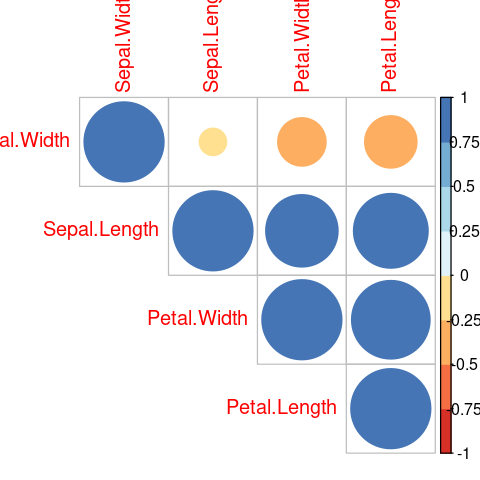

In [16]:
grf <- plot_correlation(iris %>% 
                 dplyr::select(Sepal.Width, Sepal.Length, Petal.Width, Petal.Length))
options(repr.plot.width=8, repr.plot.height=8)
grf
options(repr.plot.width=4, repr.plot.height=4)

## Matrix dispersion

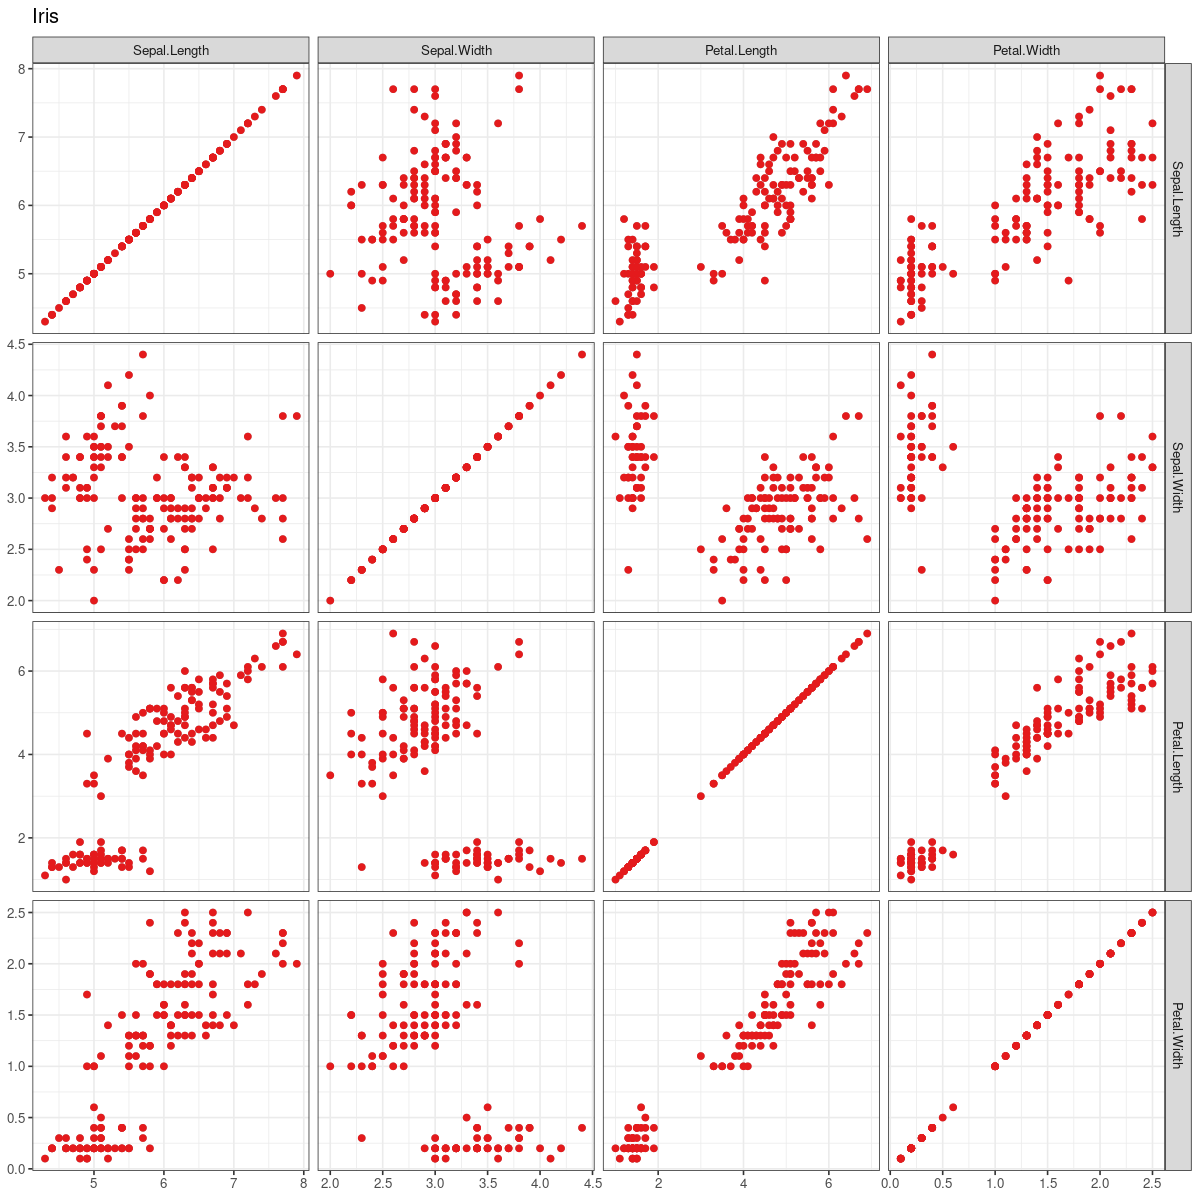

In [17]:
grf <- plot_pair(data=iris, cnames=colnames(iris)[1:4], 
                 title="Iris", colors=colors[1])

options(repr.plot.width=10, repr.plot.height=10)
plot(grf)
options(repr.plot.width=4, repr.plot.height=4)

## Matrix dispersion by the classifier

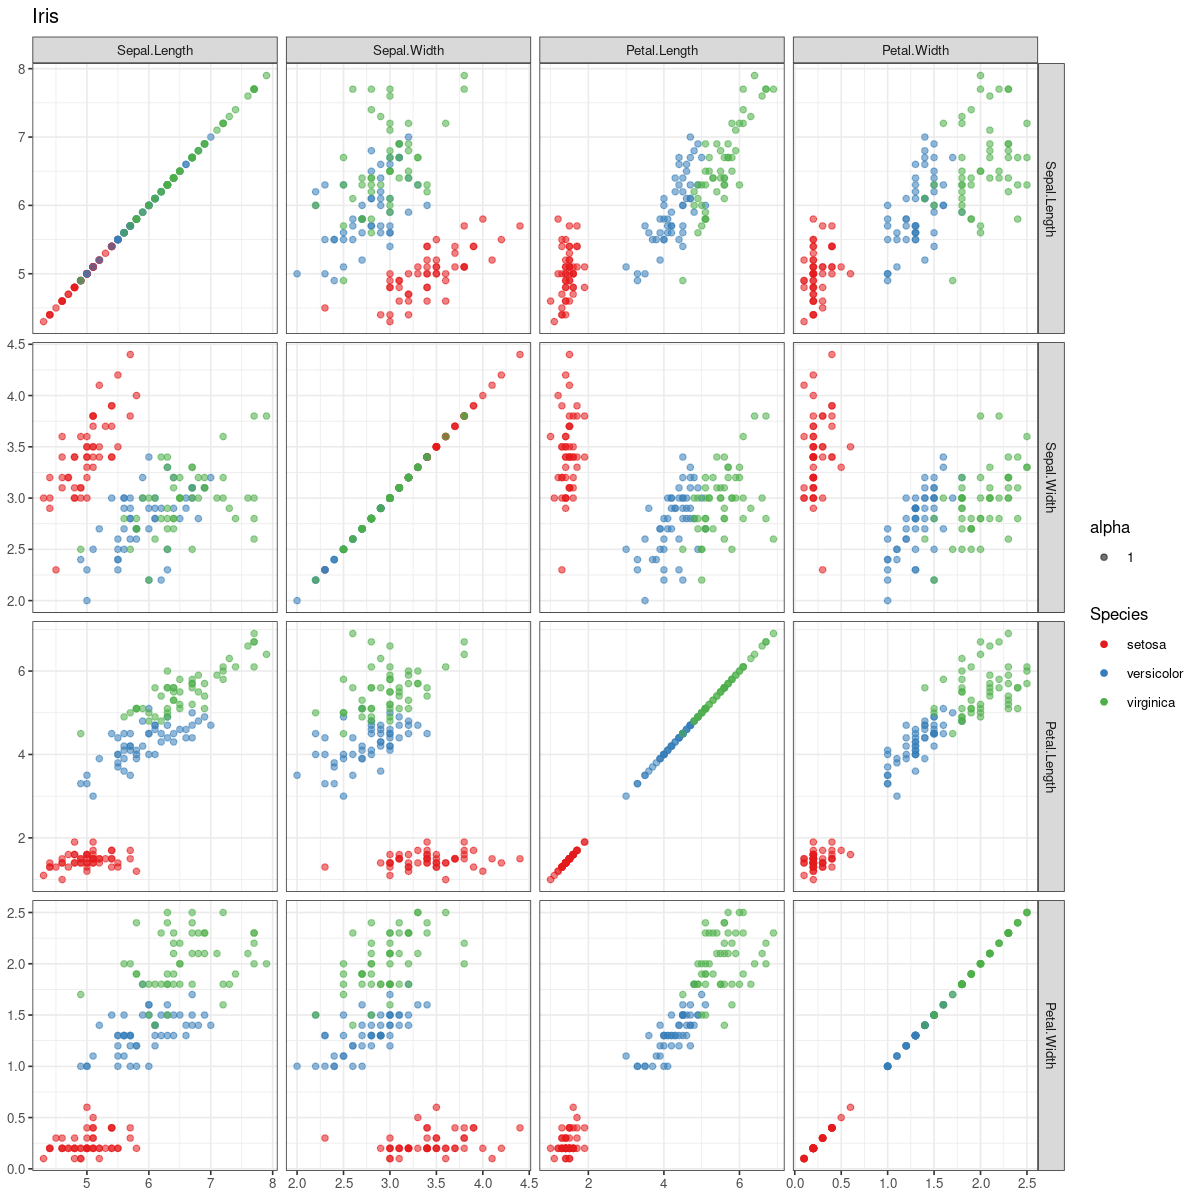

In [18]:
grf <- plot_pair(data=iris, cnames=colnames(iris)[1:4], 
                 clabel='Species', title="Iris", colors=colors[1:3])
options(repr.plot.width=10, repr.plot.height=10)
plot(grf)
options(repr.plot.width=4, repr.plot.height=4)

## Advanced matrix dispersion

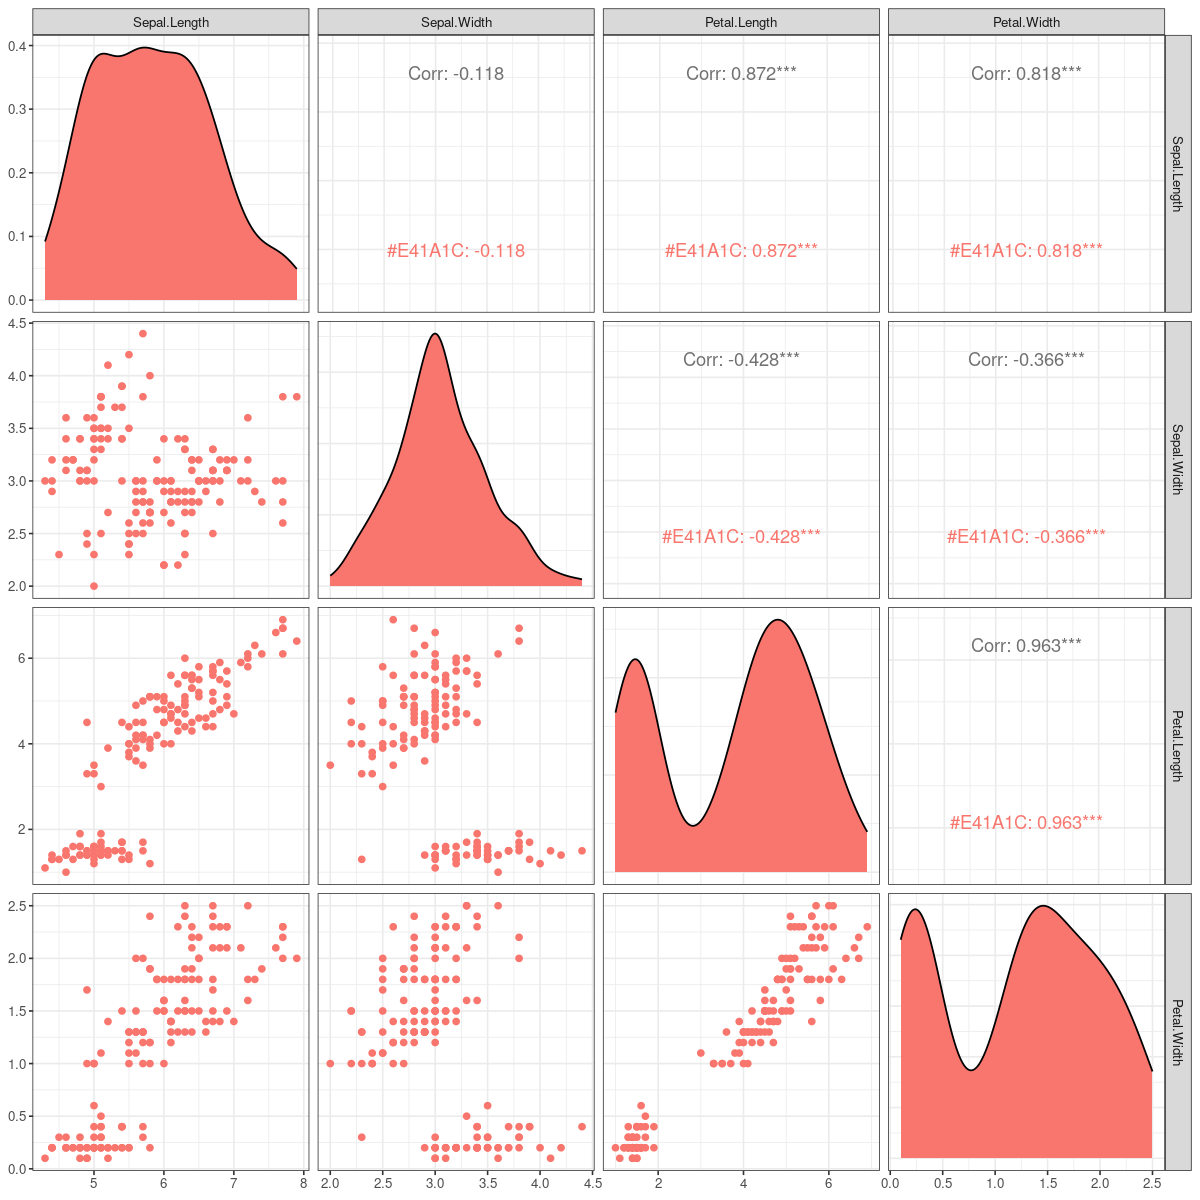

In [19]:
grf <- plot_pair_adv(data=iris, cnames=colnames(iris)[1:4], 
                     title="Iris", colors=colors[1])
options(repr.plot.width=10, repr.plot.height=10)
grf
options(repr.plot.width=4, repr.plot.height=4)

## Advanced matrix dispersion with the classifier

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


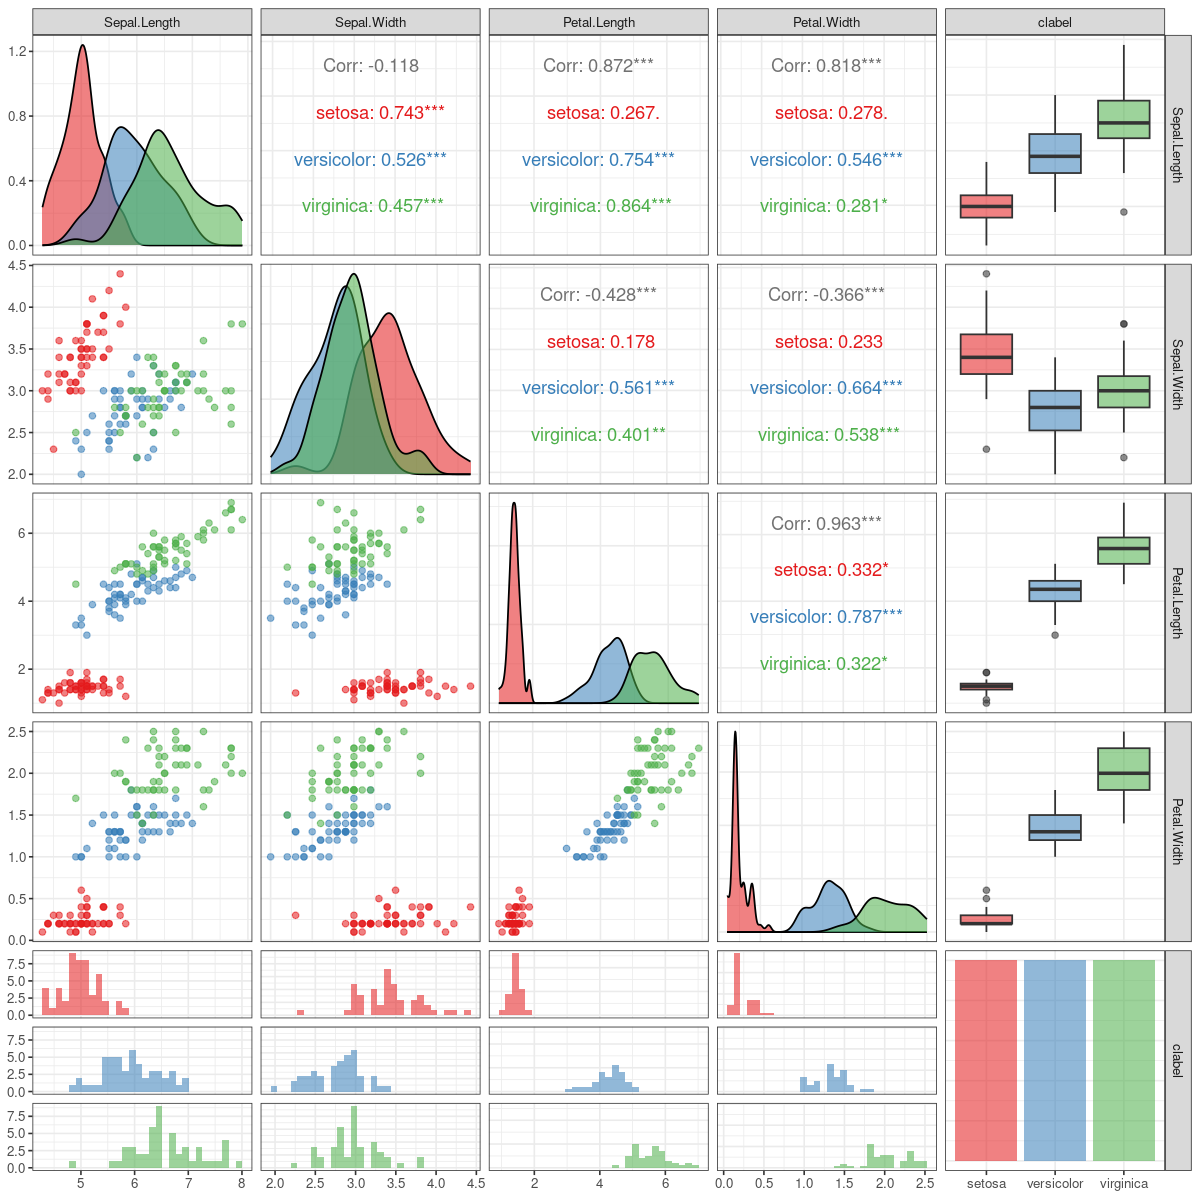

In [20]:
grf <- plot_pair_adv(data=iris, cnames=colnames(iris)[1:4], 
                        title="Iris", clabel='Species', colors=colors[1:3])
options(repr.plot.width=10, repr.plot.height=10)
grf
options(repr.plot.width=4, repr.plot.height=4)

## Parallel coordinates

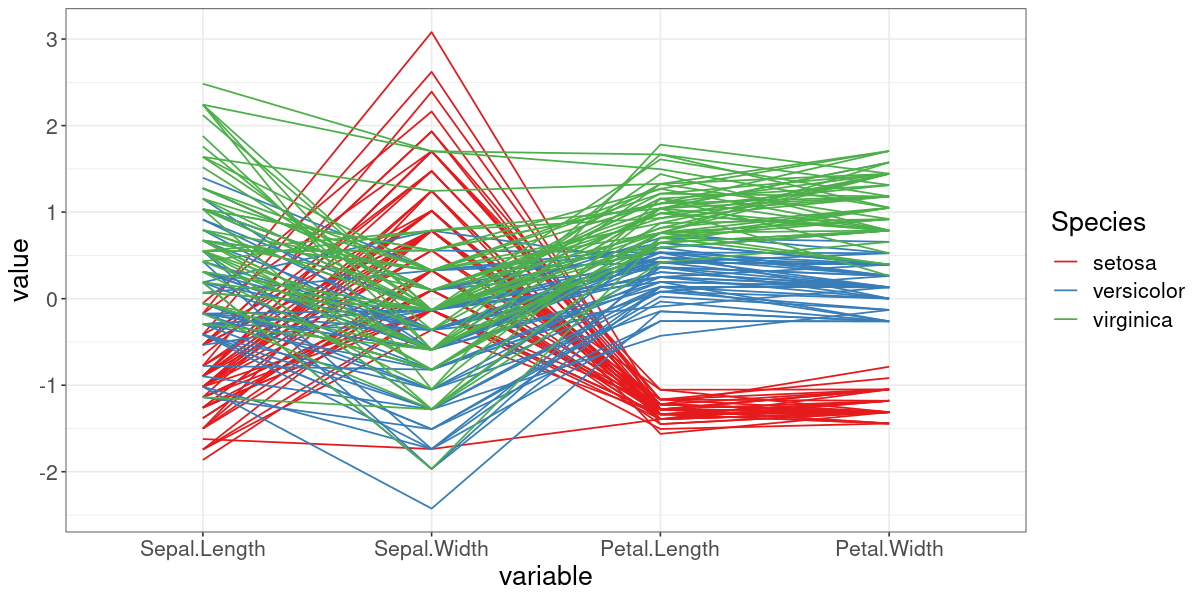

In [21]:
grf <- ggparcoord(data = iris, columns = c(1:4), group=5) + 
    theme_bw(base_size = 10) + scale_color_manual(values=colors[1:3]) + font

options(repr.plot.width=10, repr.plot.height=5)
plot(grf)
options(repr.plot.width=4, repr.plot.height=4)

## Images

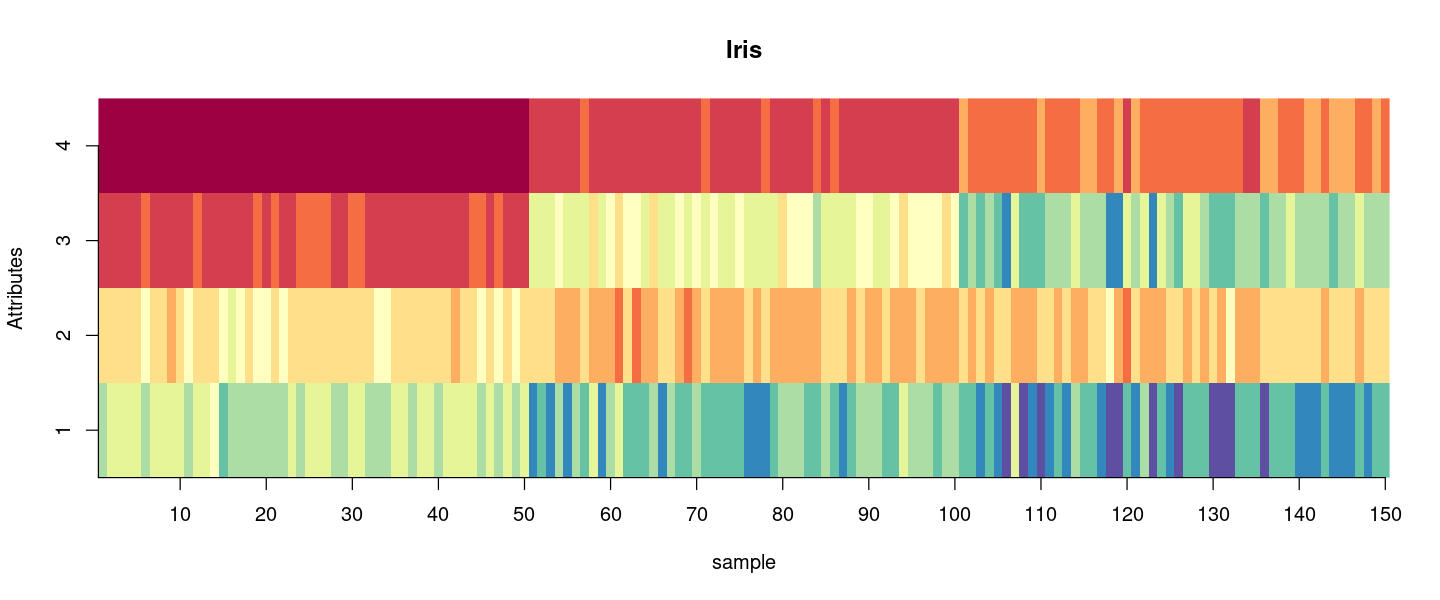

In [22]:
mat <- as.matrix(iris[,1:4])
x <- (1:nrow(mat))
y <- (1:ncol(mat))
options(repr.plot.width=12, repr.plot.height=5)
image(x, y, mat, col = brewer.pal(11, 'Spectral'), axes = FALSE,  
      main = "Iris", xlab="sample", ylab="Attributes")
axis(2, at = seq(0, ncol(mat), by = 1))
axis(1, at = seq(0, nrow(mat), by = 10))
options(repr.plot.width=4, repr.plot.height=4)

## Chernoff faces

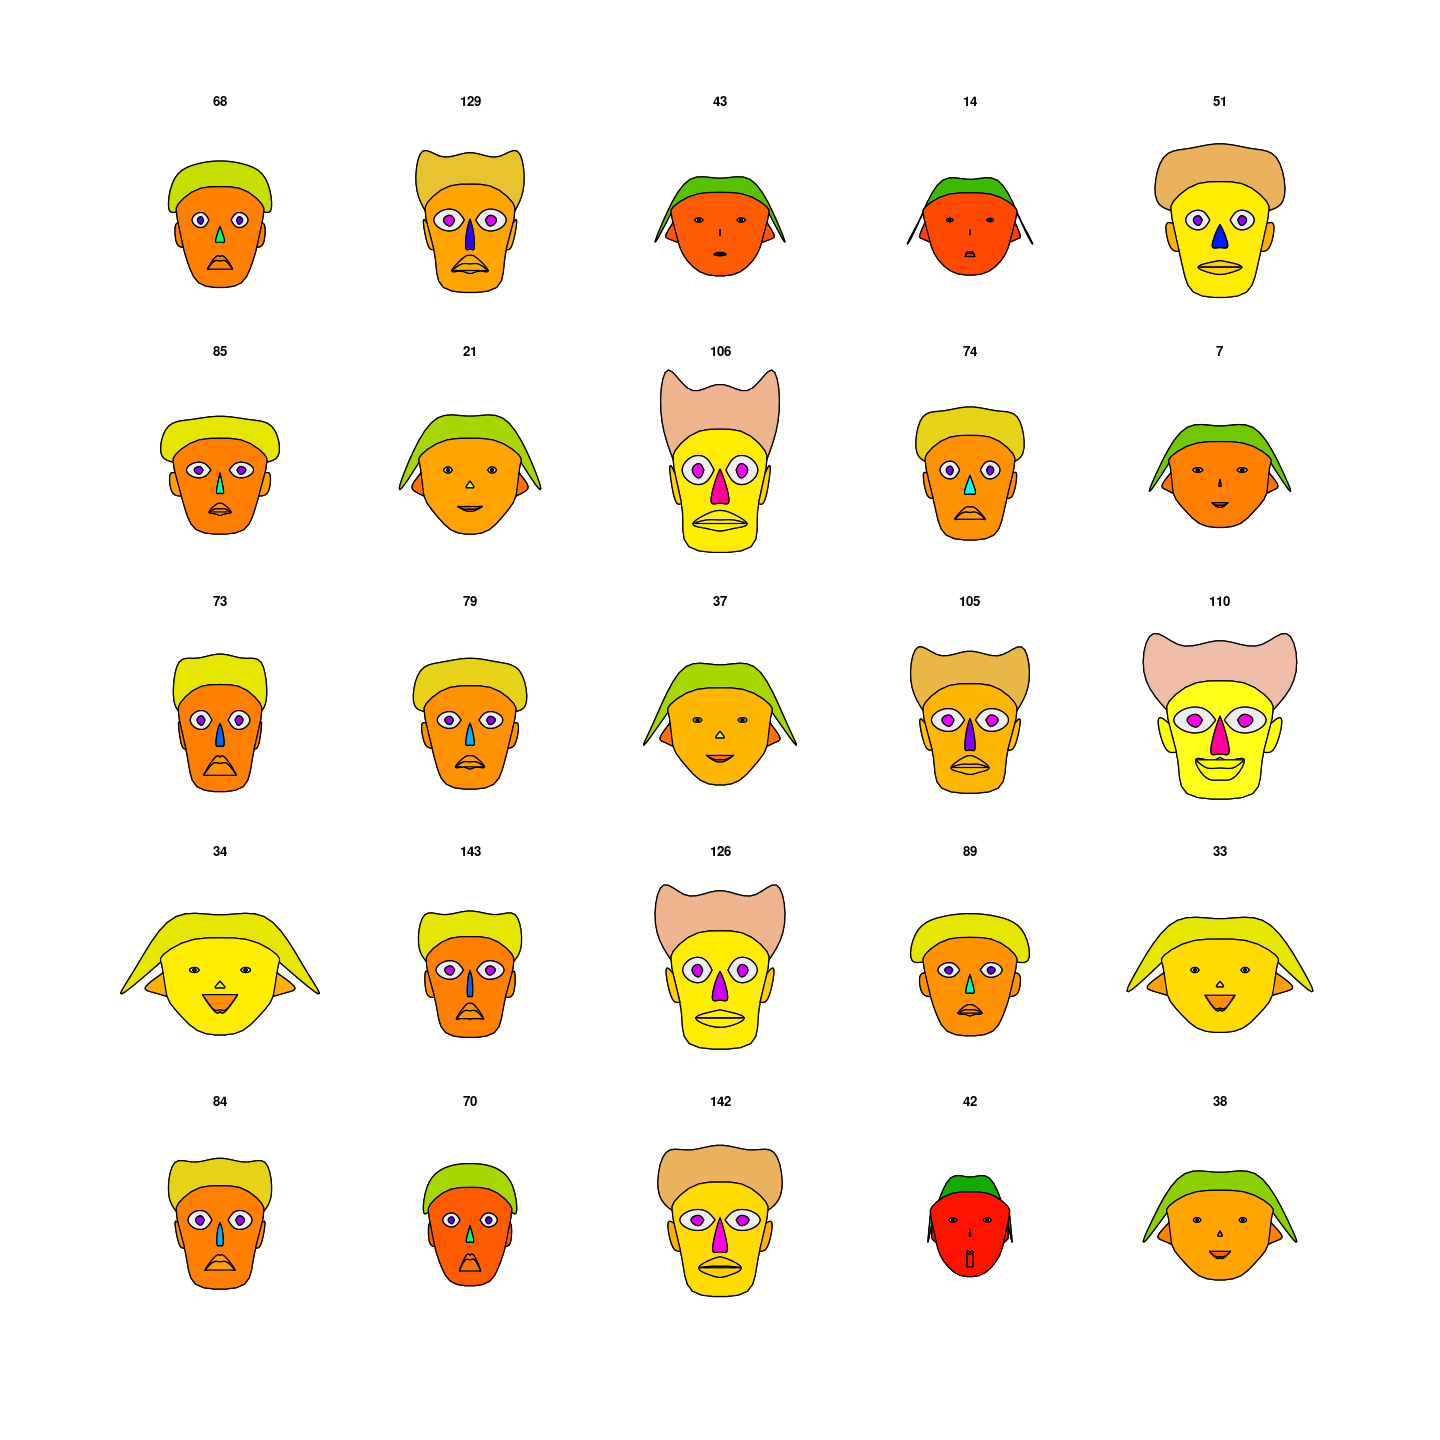

In [23]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(rownames(isample))
isample$Species <- NULL

options(repr.plot.width=12, repr.plot.height=12)
faces(isample, labels = labels, print.info=F, cex=1)
options(repr.plot.width=4, repr.plot.height=4)

## Chernoff faces with the classifier

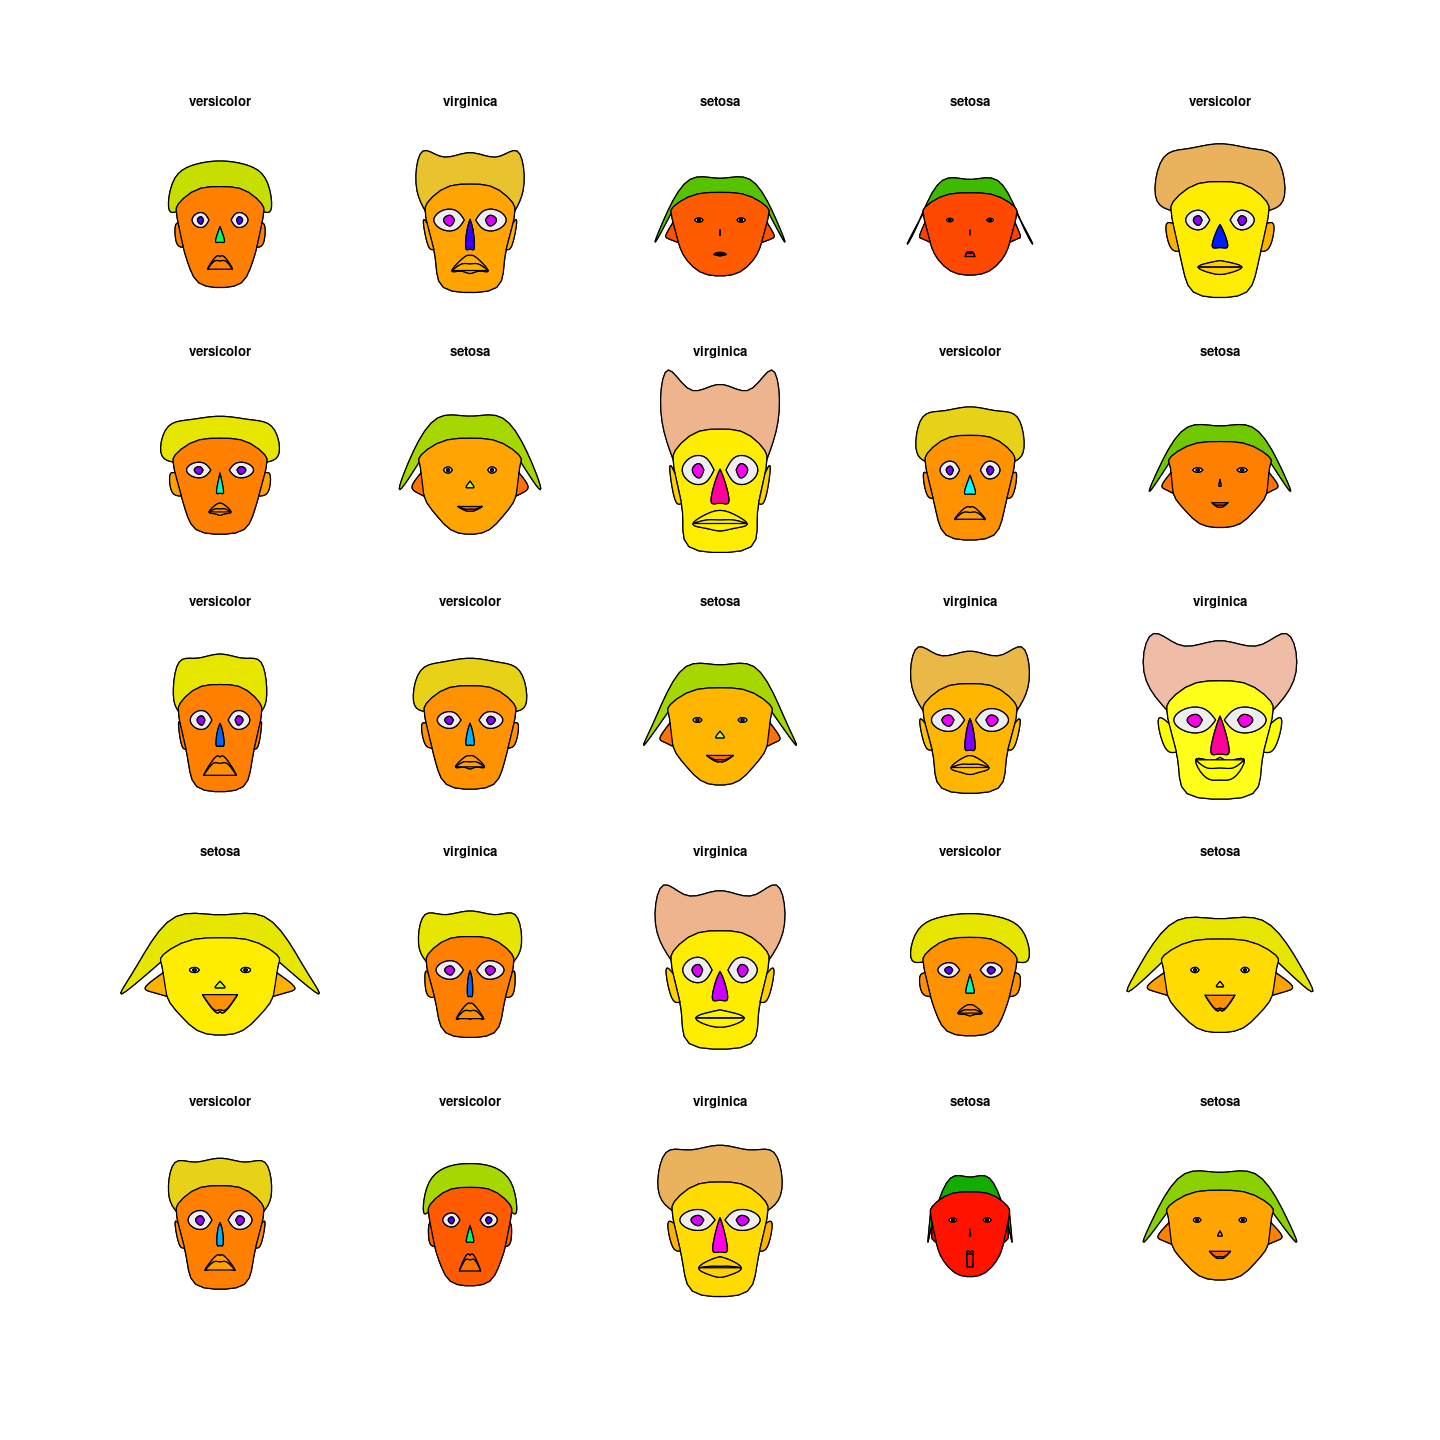

In [24]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(isample$Species)
isample$Species <- NULL

options(repr.plot.width=12, repr.plot.height=12)
faces(isample, labels = labels, print.info=F, cex=1)
options(repr.plot.width=4, repr.plot.height=4)